<a href="https://colab.research.google.com/github/charbull/svd/blob/main/SVD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from matplotlib.image import imread
import matplotlib.pyplot as plt
import numpy as np

## High level example

In [ ]:
A = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])

U, s, V = np.linalg.svd(A)

print(U)
print(s)
print(V)

[[-0.21483724  0.88723069  0.40824829]
 [-0.52058739  0.24964395 -0.81649658]
 [-0.82633754 -0.38794278  0.40824829]]
[1.68481034e+01 1.06836951e+00 4.41842475e-16]
[[-0.47967118 -0.57236779 -0.66506441]
 [-0.77669099 -0.07568647  0.62531805]
 [-0.40824829  0.81649658 -0.40824829]]


## Play with an image

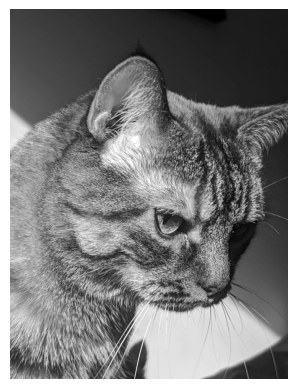

In [ ]:
A = imread('/content/mathilda.jpg')
X = np.mean(A, -1) # conver RGB to Grayscale

def print_img_with_rank(x: np.ndarray, r: int| None = None):
  img = plt.imshow(X)
  img.set_cmap('gray')
  plt.axis('off')
  if r:
    plt.title('r = '+str(r))
  plt.show()

print_img_with_rank(x=X)


In [ ]:
U, S, VT = np.linalg.svd(X, full_matrices=False) #need only the economy version

In [ ]:
print('S: ', S)
S_d = np.diag(S)
print('S_d: ', S_d)

S:  [4.10771092e+05 8.81948398e+04 5.14311686e+04 ... 6.70970490e+00
 6.56260209e+00 6.39465136e+00]
S_d:  [[4.10771092e+05 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 8.81948398e+04 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 5.14311686e+04 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 6.70970490e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  6.56260209e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 6.39465136e+00]]


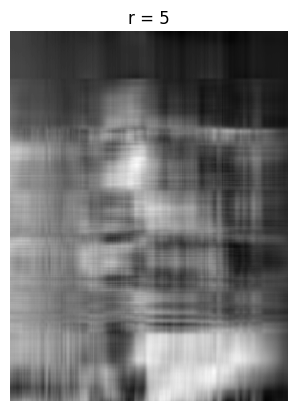

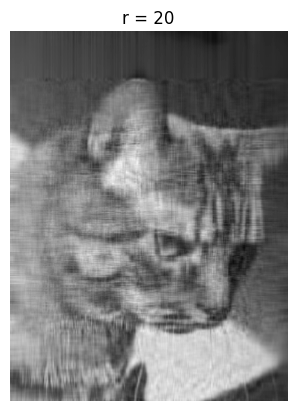

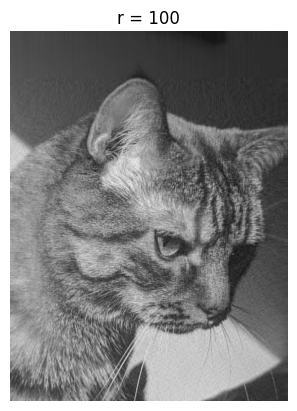

In [ ]:
j = 0
for r in (5, 20, 100):
  # construct image with ranks
  Xapprox = U[:, :r] @ S_d[0:r, :r] @ VT[:r,:]
  plt.figure(j+1)
  j +=1
  img = plt.imshow(Xapprox)
  img.set_cmap('gray')
  plt.axis('off')
  plt.title('r = '+str(r))
  plt.show()
